In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading dataset into dataframe
data=pd.read_csv(r"C:\Users\MANAS SINGH\Documents\TheWireUs\TheWireUsChallenge-master\Data Visualisation and Analysis\EDA_Day_2\Titanic.csv")

In [3]:
# Seeing the top 5 rows of data
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking datatypes of each column using info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# Now suppose we want to do the formatting of names of columns, then we can do it as follows
data=data.rename(columns={"PassengerId":"Passenger_ID","Pclass":"P_Class","SibSp":"Sib_Sp","Parch":"P_arch"})

In [6]:
# We can also change the columns names as follows
# data.columns=['Passenger_ID','Survived','P_Class','Name',Sex','Age','Sib_Sp','P_arch','Ticket','Fare','Cabin','Embarked']

# Finding out missing data

Missing data can be found out using 3 methods - 
1. Missing Data Heatmap
2. Missing Data Percentage List
3. Missing Data Histogram

# 1. Missing Data Heatmap

Used when there are smaller no of features

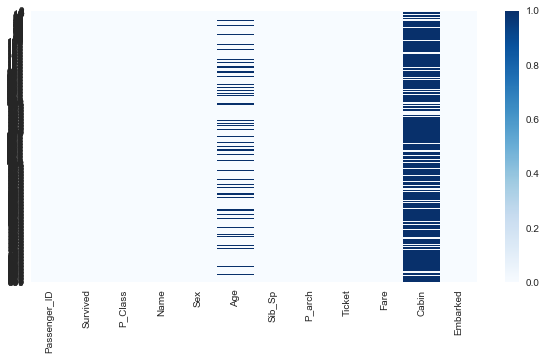

In [7]:
plt.figure(figsize=(10,5)) # Setting the size of the figure
sns.heatmap(data.isnull(),cmap="Blues") # Creating heatmap

In the above figure, missing values are represented by blue colour.
As we can see there are missing values in Age,Cabin column

# 2. Missing Data Percentage List

Used when there are large no of columns as visualization takes much longer time

In [8]:
for col in data.columns:
    pct_missing = np.mean(data[col].isnull()) # Finding mean of column
    print('{} - {}%'.format(col, round(pct_missing*100))) # Printing percentage of missing data

Passenger_ID - 0%
Survived - 0%
P_Class - 0%
Name - 0%
Sex - 0%
Age - 20%
Sib_Sp - 0%
P_arch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%


# 3. Missing Data Histogram

Used when there are large no of columns

created missing indicator for: Age
created missing indicator for: Cabin
created missing indicator for: Embarked


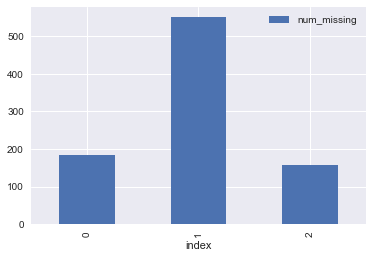

In [9]:
# first create missing indicator for features with missing data
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        data['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in data.columns if 'ismissing' in col]
data['num_missing'] = data[ismissing_cols].sum(axis=1)

data['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

As we can see Index 0 provides missing values for Age column, index 1 for Cabin and so on.

That's it. We have learnt 3 ways for finding out missing values in a dataframe